Nama : Tegar Adimas Nugroho


---

NIM : G.211.22.0088


---

Kelas : TI-B Pagi



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

Case 1

<function matplotlib.pyplot.show(close=None, block=None)>

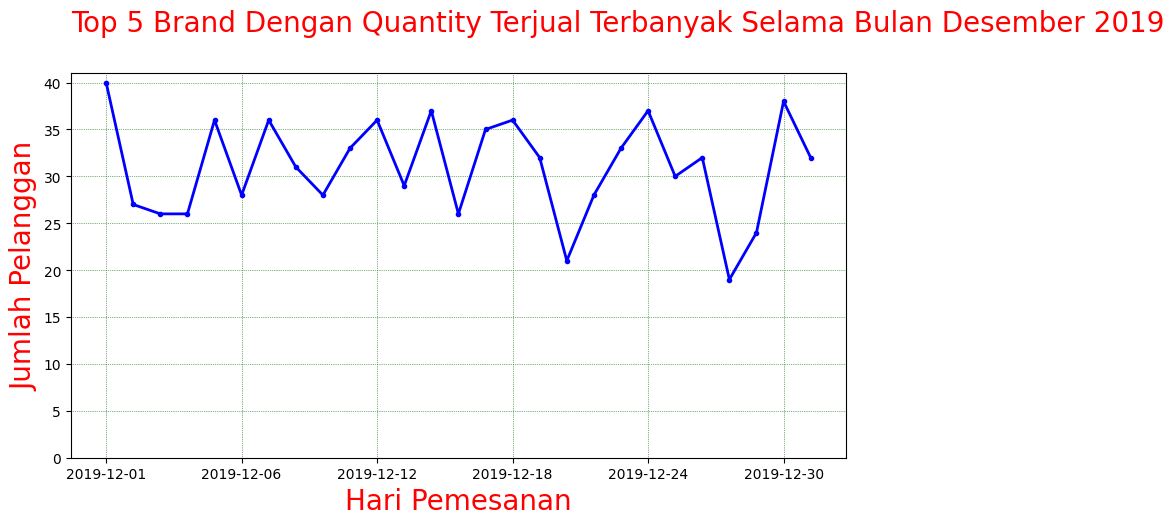

In [4]:
#Case 1 : Menentukan brand top 5
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset ['gmv'] = dataset['item_price'] * dataset['quantity']
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='blue', marker='.', linewidth=2)
plt.title('Top 5 Brand Dengan Quantity Terjual Terbanyak Selama Bulan Desember 2019', loc='left', pad=30, fontsize=20, color='red')
plt.xlabel('Hari Pemesanan', fontsize=20, color='red')
plt.ylabel('Jumlah Pelanggan', fontsize=20, color='red')
plt.grid(color='darkgreen', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show

In [5]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
            .sum()
            .reset_index()
            .sort_values(by='quantity', ascending=False)
            .head(5))
#filter hanya bulan desember dan hanya top 5 brands
dataset_topbrand5_dec = dataset[(dataset['order_month']=='2019-12') &
        (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Case 2

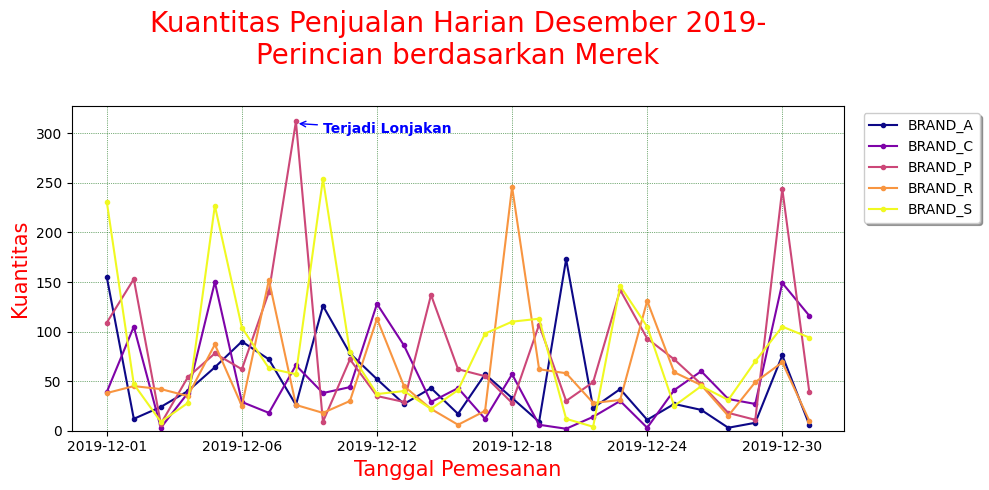

In [6]:
#Case 2
dataset_topbrand5_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.xlabel('Tanggal Pemesanan', fontsize=15, color='red')
plt.ylabel('Kuantitas', fontsize=15, color='red')
plt.title('Kuantitas Penjualan Harian Desember 2019-\nPerincian berdasarkan Merek', loc='center', pad=30, fontsize=20, color='red')
plt.grid(color='darkgreen', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi Lonjakan', xy=(7,310), xytext=(8,300), weight='bold', color='blue',
              arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color='blue'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

Case 3

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

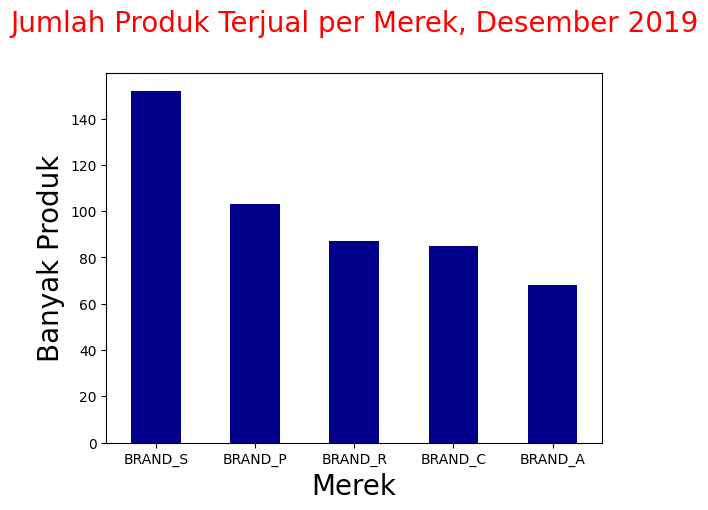

In [7]:
#Case 3
plt.clf()
dataset_topbrand5_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.ylabel('Banyak Produk', fontsize=20)
plt.xlabel('Merek', fontsize=20)
plt.title('Jumlah Produk Terjual per Merek, Desember 2019', loc='center', pad=30, fontsize=20, color='red')
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Case 4

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

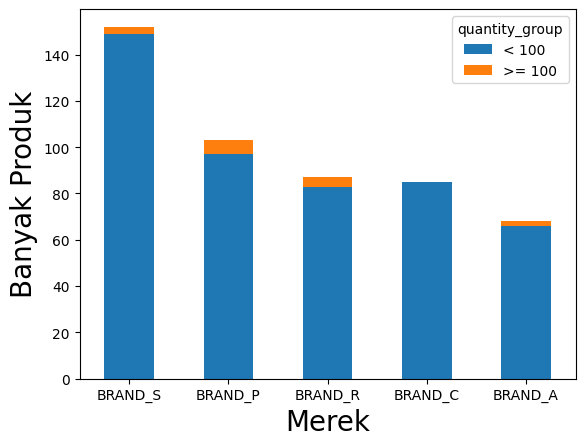

In [8]:
dataset_top5brand_dec_per_product = dataset_topbrand5_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
dataset_top5brand_dec_per_product.groupby(['brand', 'quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.ylabel('Banyak Produk', fontsize=20)
plt.xlabel('Merek', fontsize=20)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Case 5

(0.0, 2000000.0)

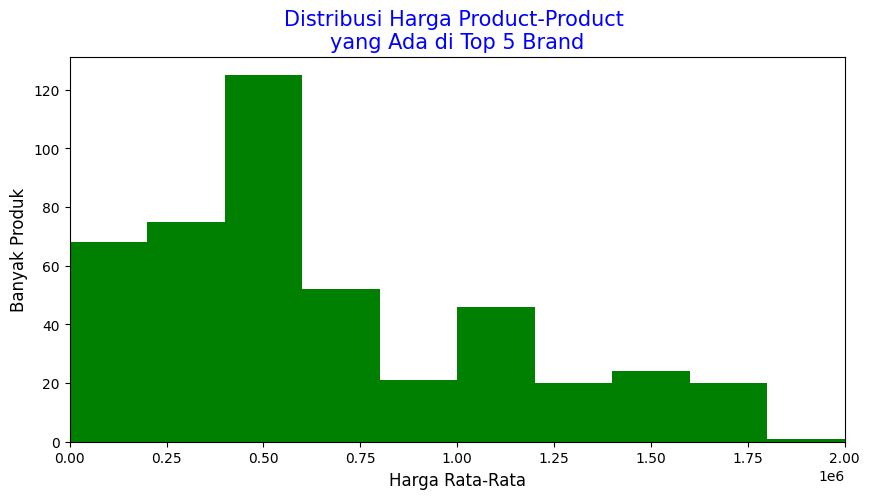

In [9]:
plt.figure(figsize=(10,5))
plt.hist(dataset_topbrand5_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribusi Harga Product-Product \nyang Ada di Top 5 Brand',fontsize=15, color='blue')
plt.ylabel('Banyak Produk', fontsize = 12)
plt.xlabel('Harga Rata-Rata',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

Case 6a

([<matplotlib.axis.YTick at 0x7efef873dcc0>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

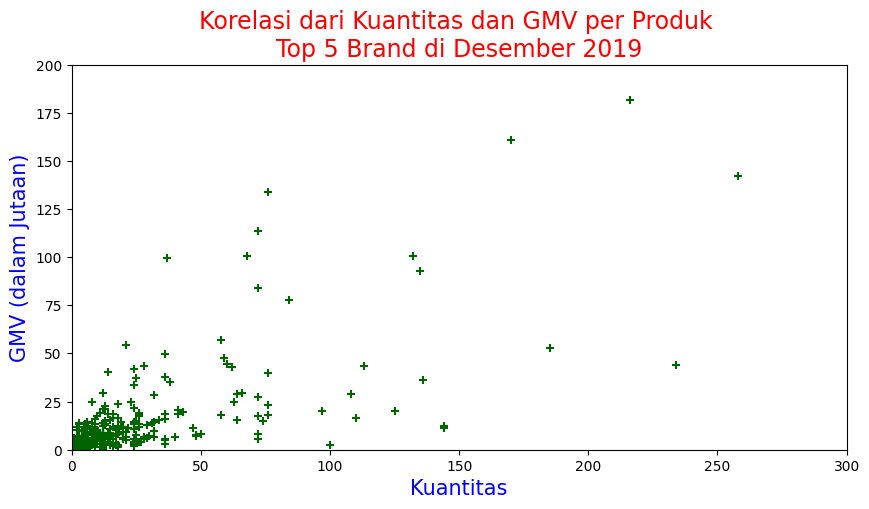

In [10]:
#agregasi setiap product
data_per_product_topbrand5_dec = dataset_topbrand5_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#plot scatter
plt.figure(figsize=(10,5))
plt.scatter(data_per_product_topbrand5_dec['quantity'],data_per_product_topbrand5_dec['gmv'], marker='+', color='darkgreen')
plt.xlabel('Kuantitas', fontsize = 15, color='blue')
plt.ylabel('GMV (dalam Jutaan)',fontsize = 15, color='blue')
plt.title('Korelasi dari Kuantitas dan GMV per Produk \nTop 5 Brand di Desember 2019',fontsize=17, color='red')
plt.ylim(ymin=0,ymax=200000000)
plt.xlim(xmin=0,xmax=300)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

Case 6b

([<matplotlib.axis.YTick at 0x7efef87bba90>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

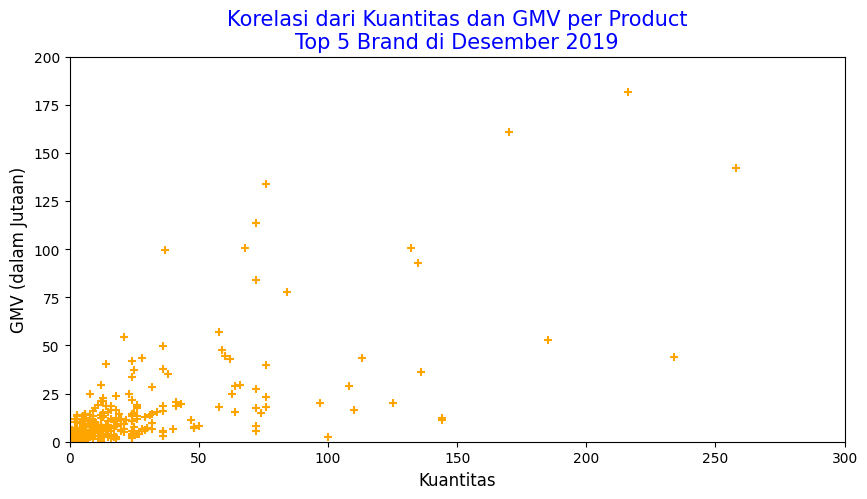

In [11]:
#agregat per product
data_per_product_topbrand5_dec = dataset_topbrand5_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,5))
plt.scatter(data_per_product_topbrand5_dec['quantity'],data_per_product_topbrand5_dec['gmv'], marker='+', color='orange')
plt.title('Korelasi dari Kuantitas dan GMV per Product\nTop 5 Brand di Desember 2019',fontsize=15, color='blue')
plt.xlabel('Kuantitas', fontsize = 12)
plt.ylabel('GMV (dalam Jutaan)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))